# Supervised Classification on Codon Usage Dataset

#### Classifier:
1. KNN
2. Random Forest

### Abstract: 
DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa

### Attribute Information:

- Column 1: Kingdom 
- Column 2: DNAtype 
- Column 3: SpeciesID 
- Column 4: Ncodons 
- Column 5: SpeciesName 
- Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number)) 

## Problem Statement :

### Classifying different species into their Kingdom types on the basis of codon frequency usage as input features with Genomic DNA type.

#### Class labels: 
1. Virus 
2. Bacteria 
3. Plants
4. Vertebrates
5. Invertebrates

## Importing Libraries and Dataset

In [1]:
import pandas as pd
from matplotlib import pyplot  as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.core.dtypes.cast import maybe_downcast_numeric
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import numpy as np
from sklearn import model_selection
from collections import defaultdict
from sklearn.metrics import roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot  as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv(r"../data/codon_usage_dataset_processed.csv")
df = df.drop(columns=['SpeciesID', 'SpeciesName', 'Ncodons'])
df.head()

,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [3]:
df.shape

(8657, 65)

### Label Encoding

In [4]:
df['Kingdom'], unique_labels = pd.factorize(df['Kingdom'])
df.head()

,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [5]:
df.describe()

,Kingdom,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,...,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000
mean,1.222710,0.019945,0.020836,0.013814,0.015684,0.014446,0.015746,0.007800,0.021774,0.022131,...,0.006725,0.011355,0.008121,0.028814,0.025561,0.030758,0.027695,0.001377,0.000598,0.001013
std,1.167005,0.011201,0.009112,0.013628,0.007658,0.007225,0.010625,0.005028,0.017619,0.012348,...,0.007331,0.008183,0.006202,0.011944,0.012523,0.014711,0.012830,0.001719,0.000811,0.001250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.012010,0.014420,0.003270,0.010350,0.009450,0.008200,0.003880,0.009030,0.013640,...,0.002020,0.004330,0.003140,0.020900,0.016790,0.020780,0.018640,0.000480,0.000000,0.000230
50%,1.000000,0.019250,0.020440,0.010160,0.015160,0.013850,0.013660,0.007580,0.015940,0.021220,...,0.004620,0.010860,0.006710,0.029340,0.023000,0.029160,0.026020,0.001060,0.000450,0.000760
75%,2.000000,0.027030,0.026370,0.019300,0.020200,0.018780,0.021180,0.010890,0.030220,0.029050,...,0.008470,0.016490,0.012100,0.036750,0.032110,0.038920,0.034940,0.001910,0.000820,0.001450
max,4.000000,0.086600,0.074240,0.090440,0.061860,0.051680,0.096260,0.035180,0.107370,0.086540,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.014200,0.033150


In [6]:
unique_labels

Index(['vrl', 'bct', 'pln', 'inv', 'vrt'], dtype='object')

In [7]:
features_raw = df.drop('Kingdom', axis=1)
target = df.Kingdom

### Train-Test Split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(features_raw,
                                                target,
                                                stratify=target,
                                                random_state=42,
                                                shuffle=True,
                                                test_size=0.3)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
mxscaler = MinMaxScaler()
features = pd.DataFrame(mxscaler.fit_transform(features_raw),columns=features_raw.columns)

features_stats = features.describe()
features_stats

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,...,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000
mean,0.230311,0.280659,0.152742,0.253538,0.279526,0.163574,0.221718,0.202795,0.255737,0.266977,...,0.121088,0.114897,0.138991,0.155200,0.224537,0.212284,0.174674,0.030456,0.042118,0.030573
std,0.129347,0.122738,0.150686,0.123788,0.139810,0.110374,0.142908,0.164101,0.142687,0.125491,...,0.131988,0.082796,0.106147,0.064333,0.110001,0.101535,0.080921,0.038042,0.057126,0.037713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.138684,0.194235,0.036157,0.167313,0.182856,0.085186,0.110290,0.084102,0.157615,0.179690,...,0.036370,0.043813,0.053740,0.112571,0.147488,0.143419,0.117565,0.010619,0.000000,0.006938
50%,0.222286,0.275323,0.112340,0.245070,0.267995,0.141907,0.215463,0.148459,0.245205,0.247958,...,0.083183,0.109886,0.114838,0.158031,0.202038,0.201256,0.164112,0.023451,0.031690,0.022926
75%,0.312125,0.355199,0.213401,0.326544,0.363390,0.220029,0.309551,0.281457,0.335683,0.344508,...,0.152503,0.166852,0.207085,0.197942,0.282063,0.268618,0.220372,0.042257,0.057746,0.043741
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Kingdom, dtype: int64

### Model Evaluation Function

In [11]:
metric_arr = defaultdict(list)

def evaluate(model,X_train,X_test,y_train,y_test, y_pred):
    print()
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    metric_arr['precision'].append( str(precision))
    metric_arr['recall'].append(str(recall))
    metric_arr['fscore'].append(str(fscore))
    metric_arr['support'].append(str(support))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(55*'-')
    print('Confusion Matrix')
    print(55*'-')
    print(cnf_matrix)
    print(55*'-')

# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    metric_arr['sensitivity'].append(TPR)
    metric_arr['specificity'].append(TNR)

    acc =model.score(X_test,y_test)*100
    metric_arr['accuracy'].append(acc)
    print(55*'-')
    print('Accuracy')
    print(55*'-')
    print(acc)
    print(55*'-')

    auc = roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
    metric_arr['auc'].append(auc)

## Nearest Neighbors (KNN)

In [12]:
#Split randomly and for each split check with neigbors ranging from 1 to 5
# for i in tqdm(range(1,10+1)):

neigh = KNeighborsClassifier(n_jobs=1, n_neighbors= 3, p=5.0)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
y_prob_pred_cnb = neigh.predict_proba(X_test)

# metric_arr['model']  .append('knn')
# metric_arr['split']  .append(i) 
# break

In [13]:
print(55 * "=")
print("K Nearest Neighbors")
print(55 * "-")
print(classification_report(y_test, y_pred))
print(55 * "=")

K Nearest Neighbors
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       850
           1       0.95      0.97      0.96       875
           2       0.85      0.89      0.87       457
           3       0.84      0.66      0.74       277
           4       0.87      0.91      0.89       139

    accuracy                           0.91      2598
   macro avg       0.89      0.88      0.88      2598
weighted avg       0.91      0.91      0.91      2598



In [14]:
evaluate(neigh, X_train,X_test,y_train,y_test, y_pred)


-------------------------------------------------------
Confusion Matrix
-------------------------------------------------------
[[801   8  27   9   5]
 [ 11 845  11   7   1]
 [ 18  14 408  13   4]
 [ 33  19  32 184   9]
 [  7   0   0   5 127]]
-------------------------------------------------------
-------------------------------------------------------
Accuracy
-------------------------------------------------------
91.03156274056967
-------------------------------------------------------


K Nearest Neighbors


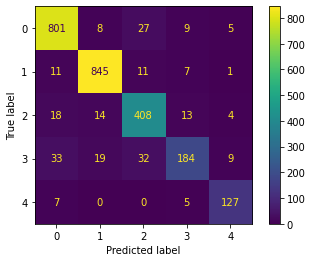

In [15]:
print('K Nearest Neighbors')
plot_confusion_matrix(neigh, X_test, y_test)
plt.show()

In [16]:
metric_arr

defaultdict(list,
            {'precision': ['[0.92068966 0.9537246  0.85355649 0.8440367  0.86986301]'],
             'recall': ['[0.94235294 0.96571429 0.89277899 0.66425993 0.91366906]'],
             'fscore': ['[0.93139535 0.959682   0.87272727 0.74343434 0.89122807]'],
             'support': ['[850 875 457 277 139]'],
             'sensitivity': [array([0.94235294, 0.96571429, 0.89277899, 0.66425993, 0.91366906])],
             'specificity': [array([0.96052632, 0.97620429, 0.967305  , 0.98535114, 0.99227328])],
             'accuracy': [91.03156274056967],
             'auc': [0.9723200469748444]})

In [17]:
# X_test
# y_pred
# y_test
predictions = X_test.merge(y_test.to_frame(), left_index=True, right_index=True)
predictions['y_predicted']= y_pred
predictions['iscorrect'] = predictions.apply(lambda x : 'Yes' if x['Kingdom'] == x['y_predicted'] else "No", axis=1)



Detecting to outtliers

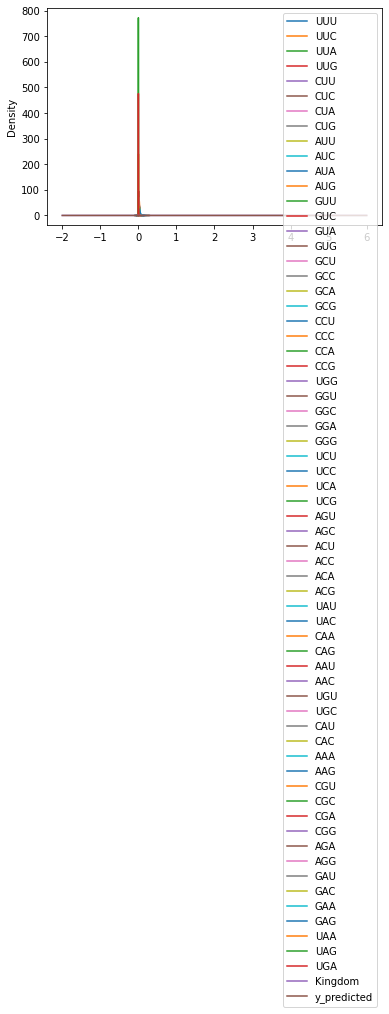

<Figure size 1080x720 with 0 Axes>

In [18]:
skip = set(['Kingdom', 'y_predicted', 'iscorrect','outlier'])

def detect_outlier(row):
    res = []
    for c in predictions.columns:
        if c in skip: continue
        res.append(abs((row[c] - features_stats[c]['mean']) /features_stats[c]['std']) > 3)
    # limit = features_stats[c]['mean'] +   6 * features_stats[c]['std']
    # res.append( abs(row[c]) > limit )
    if any(res):
        return True
    else:
        return False


inc_predictions = predictions[predictions['iscorrect'] == 'No']
inc_predictions['outlier'] = inc_predictions.apply(lambda x : detect_outlier(x), axis=1)
inc_predictions.plot.kde()
plt.figure(figsize=[15,10])
plt.show()

In [19]:
inc_predictions.groupby(['outlier']).count()


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom,y_predicted,iscorrect
outlier,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
True,232,232,232,232,232,232,232,232,232,232,...,232,232,232,232,232,232,232,232,232,232


In [20]:
predictions.groupby(['iscorrect']).count()


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom,y_predicted
iscorrect,,,,,,,,,,,,,,,,,,,,,
No,233,233,233,233,233,233,233,233,233,233,...,233,233,233,233,233,233,233,233,233,233
Yes,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,...,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365


## Random Forest Classifier

In [21]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

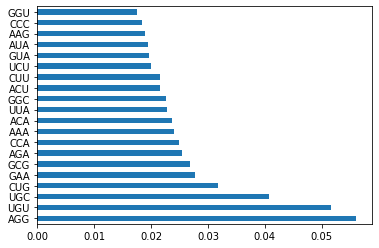

In [22]:
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [23]:
imp_cols = feat_importances.nlargest(30).index.to_list()
imp_cols

['AGG',
 'UGU',
 'UGC',
 'CUG',
 'GAA',
 'GCG',
 'AGA',
 'CCA',
 'AAA',
 'ACA',
 'UUA',
 'GGC',
 'ACU',
 'CUU',
 'UCU',
 'GUA',
 'AUA',
 'AAG',
 'CCC',
 'GGU',
 'GGG',
 'CUA',
 'GCU',
 'UUC',
 'CGC',
 'GGA',
 'UAU',
 'CCG',
 'AUU',
 'UAC']

Model Important features

In [24]:
features_raw=features_raw[features_raw.columns.intersection(imp_cols)]
features_raw

,UUC,UUA,CUU,CUA,CUG,AUU,AUA,GUA,GCU,GCG,...,UAU,UAC,UGU,UGC,AAA,AAG,CGC,AGA,AGG,GAA
0,0.01203,0.00050,0.01203,0.00100,0.04010,0.00551,0.00752,0.00902,0.01003,0.01103,...,0.00501,0.02256,0.00251,0.01153,0.01053,0.03860,0.00702,0.01303,0.03559,0.01203
1,0.01357,0.00068,0.00407,0.00204,0.04410,0.01153,0.00882,0.00814,0.01085,0.01357,...,0.00475,0.02917,0.00271,0.01628,0.00543,0.03392,0.00678,0.01696,0.03596,0.01560
2,0.02180,0.01357,0.00782,0.01028,0.01193,0.02283,0.01316,0.01213,0.02406,0.00514,...,0.02612,0.01275,0.01625,0.01234,0.02077,0.03949,0.00596,0.01974,0.02489,0.02242
3,0.02245,0.01619,0.01567,0.00940,0.01723,0.02402,0.02507,0.01723,0.02141,0.00522,...,0.02141,0.00888,0.00992,0.00888,0.03133,0.04282,0.00261,0.01410,0.01671,0.03029
4,0.01371,0.00767,0.01380,0.00473,0.02076,0.02716,0.01310,0.00920,0.02878,0.01577,...,0.02089,0.01367,0.01082,0.00705,0.03408,0.03964,0.00429,0.01494,0.01734,0.03359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,0.03025,0.00336,0.01176,0.00588,0.05882,0.01345,0.01176,0.00420,0.01933,0.00504,...,0.00504,0.02437,0.01597,0.02101,0.01849,0.02353,0.00504,0.01261,0.01176,0.01597
8653,0.04353,0.00450,0.00901,0.00600,0.04053,0.01576,0.00413,0.00450,0.01801,0.00938,...,0.00488,0.02101,0.01163,0.01313,0.02439,0.02664,0.00563,0.01013,0.01088,0.02477
8654,0.02483,0.00241,0.01655,0.00293,0.04552,0.02000,0.00569,0.00397,0.03897,0.01017,...,0.00603,0.02259,0.00862,0.01414,0.02017,0.03983,0.01172,0.01241,0.01155,0.01569
8655,0.01079,0.01191,0.01240,0.00521,0.01377,0.02493,0.02282,0.01228,0.01563,0.00211,...,0.03089,0.02022,0.02927,0.02716,0.03721,0.01997,0.00385,0.01898,0.00558,0.04317


In [25]:
imp_features = pd.DataFrame(mxscaler.fit_transform(features_raw),columns=imp_cols)

imp_features_stats = imp_features.describe()
imp_features_stats

X_train,X_test,y_train,y_test = train_test_split(imp_features, 
                                                 target, 
                                                 test_size=0.3,
                                                 shuffle=True,
                                                 stratify=target,
                                                 random_state=42)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_prob_pred_cnb = forest.predict_proba(X_test)


In [26]:
evaluate(forest, X_train,X_test,y_train,y_test, y_pred)



-------------------------------------------------------
Confusion Matrix
-------------------------------------------------------
[[821   7  15   4   3]
 [ 12 854   7   2   0]
 [ 45  17 383  12   0]
 [ 46  21  27 175   8]
 [ 13   0   6   8 112]]
-------------------------------------------------------
-------------------------------------------------------
Accuracy
-------------------------------------------------------
90.26173979984603
-------------------------------------------------------


Random Forest


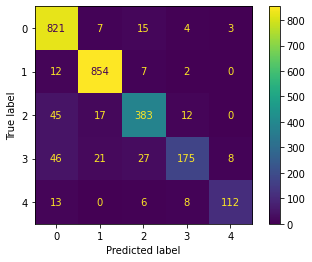

In [27]:
print('Random Forest')
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

In [31]:
print(55 * "=")
print("Random Forest on top 30 features")
print(55 * "-")
print(classification_report(y_test, y_pred))
print(55 * "=")

Random Forest on top 30 features
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       850
           1       0.95      0.98      0.96       875
           2       0.87      0.84      0.86       457
           3       0.87      0.63      0.73       277
           4       0.91      0.81      0.85       139

    accuracy                           0.90      2598
   macro avg       0.90      0.84      0.86      2598
weighted avg       0.90      0.90      0.90      2598



With kfold cross validation

In [29]:
cv = ShuffleSplit(n_splits=10, test_size=0.30, random_state=0)

score_rf = cross_val_score(RandomForestClassifier(n_estimators=40), imp_features, target, cv=cv)

print("Avg :", np.average(score_rf))
score_rf

Avg : 0.8881832178598923


array([0.89068514, 0.88876059, 0.8791378 , 0.88760585, 0.89915319,
       0.88337182, 0.90107775, 0.88452656, 0.88067744, 0.88683603])

In [30]:
metric_arr

defaultdict(list,
            {'precision': ['[0.92068966 0.9537246  0.85355649 0.8440367  0.86986301]',
              '[0.87620064 0.94994438 0.87442922 0.87064677 0.91056911]'],
             'recall': ['[0.94235294 0.96571429 0.89277899 0.66425993 0.91366906]',
              '[0.96588235 0.976      0.8380744  0.63176895 0.8057554 ]'],
             'fscore': ['[0.93139535 0.959682   0.87272727 0.74343434 0.89122807]',
              '[0.91885842 0.96279594 0.85586592 0.73221757 0.85496183]'],
             'support': ['[850 875 457 277 139]', '[850 875 457 277 139]'],
             'sensitivity': [array([0.94235294, 0.96571429, 0.89277899, 0.66425993, 0.91366906]),
              array([0.96588235, 0.976     , 0.8380744 , 0.63176895, 0.8057554 ])],
             'specificity': [array([0.96052632, 0.97620429, 0.967305  , 0.98535114, 0.99227328]),
              array([0.93363844, 0.97388276, 0.97431107, 0.98879793, 0.99552664])],
             'accuracy': [91.03156274056967, 90.26173979984603